## Tarea 1 (parte 1)
Integrantes:
    * Alejandro Muñoz 
    * Aaron Figueroa
Profesor:
    * Oscar Ramos
    
La respuesta a cada pregunta debe tener un desarrollo que muestre el procedimiento seguido, los resultados obtenidos, y una descripción (explicación/justificación) de dichos resultados. Se debe adjuntar, además, el código utilizado: puede ser como anexo, al final del documento, o como archivos adjuntos al momento de realizar la entrega por canvas. Para todas las siguientes preguntas se debe implementar el proceso de entrenamiento y verificación de manera explícita (no se debe usar software adicional)


#### Librerias utilizadas: 


In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import random

#### Funciones Utilizadas: 


In [2]:
def plot_data(X, y):
    """
    Grafica los puntos X (compuesto por x1 y x2) en una figura. Se grafica los
    datos positivos (1) con triángulos amarillos, y los negativos (0) con
    círculos verdes.
    
    Argumentos
    ----------
        X - Matriz (2,n) que contiene cada una de las n instancias como columnas.
            Solo se grafica los dos primeros atributos (dos primeras filas)
        y - Vector (1,n) que contiene las clases de las instancias
    
    """
    pos = np.where(y.flatten()==1)[0]
    neg = np.where(y.flatten()==0)[0]
    Xpos = X[:,pos]; Xneg = X[:,neg];
    plt.figure(figsize=(6,6))
    plt.plot(Xpos[0,:], Xpos[1,:],'y^',label='Clase 1')
    plt.plot(Xneg[0,:], Xneg[1,:],'go',label='Clase 0')
    plt.xlabel('$x_1$'); plt.ylabel('$x_2$')
    plt.legend(); plt.axis('scaled')


def plot_frontera(w0, w):
    """
    Grafica la frontera de decisión definida por w y w0

    Argumentos
    ----------
        w0 - Bias del modelo
         w - Vector (d,1) que contiene los parámetros del modelo (w1, w2, ... wd)

    """
    # Rango de las celdas
    u = np.linspace(-2, 2.5, 50)
    v = np.linspace(-2, 2.5, 50)
    # Celdas
    z = np.zeros((u.size, v.size))
    # Evaluación de cada una de las celdas
    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            base = generacion_bases(np.array([[ui], [vj]]))
            z[i,j] = np.dot(w.T, base) + w0
            
    z = z.T
    # Gráfico de z = 0
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
    plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
    


def generacion_bases(X, grado=6):
    """
    Genera bases polinomiales x1, x2, x1^2, x1*x2, x2^2, ... hasta un cierto grado

    Argumentos
    ----------
          X - Matriz de tamaño (2,n) donde n es el número de instancias
      grado - grado de las bases polinomiales

    Retorna
    -------
       Xout - Matriz de tamaño (2+m, n) donde se añade m filas según el grado

    """
    X1 = X[0,:]; X2 = X[1,:]
    res = []
    for i in range(1, grado + 1):
        for j in range(i + 1):
            res.append((X1 ** (i - j)) * (X2 ** j))
    return np.array(res)


### Pregunta 1

Considerar los datos que se brindan en el archivo datos regresion train.csv,
donde la primera columna corresponde a los atributos, y la segunda columna a los valores deseados. Desarrollar un modelo de regresión que se ajuste a los datos. Mostrar la función de costo en función del número de iteraciones. Evaluar el desempeño del modelo usando los datos de datos_regresion_test.csv, a través del MSE. Dado que es un modelo de una sola variable, graficar, además, los datos reales junto con los datos que se predice.

#### Lectura de datos:

Se leeran los datos para el entrenamiento y el testeo del ejercicio 1. En este modelo no consideramos necesario normalizar nuestros datos.

In [3]:
# Lectura de datos
df = np.loadtxt('dataregresiontrain.txt', delimiter=',')
test = np.loadtxt('dataregresiontest.txt', delimiter=',')

In [4]:
X = df[:, 0:1]   # Primeras dos columnas  (atributos)
y = df[:, 1]     # Última columna  (valores deseados)
n = len(y)         # Número de instancias

# Adecuación del tamaño de X, y para usar la implementación vectorizada
X = X.T      
y = y[None]   # equivalente a y.reshape((1,50))


#### Funciones de hipótesis y costo para regresión lineal

In [5]:
# Función de hipótesis
def h(X, w0,w1,w2,w3,w4,w5):
    return np.dot(w1, X)+ np.dot(w2, X**2)+np.dot(w3, X**3)+np.dot(w4, X**4) +np.dot(w5, X**5) + w0

# Función de costo
def fcosto(X, y, w0,w1,w2,w3,w4,w5):
    n = y.size
    e = h(X, w0, w1, w2, w3,w4,w5) - y
    return 1/(2*n)*np.sum(np.square(e))

La función de costo es : 113.447


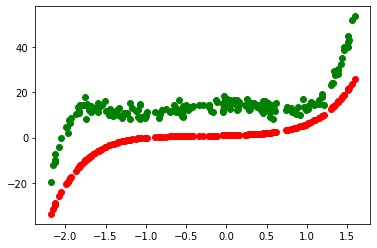

In [6]:
# Valores iniciales de los pesos del modelo sin descenso de gradiente
w0=1
w1=1
w2=1
w3=1
w4=1
w5=1
ypred=h(X,w0,w1,w2,w3,w4,w5)

plt.plot(X,ypred,marker="o", linestyle='-',linewidth=3, color = 'red')
plt.plot(X,y,marker="o",linestyle='-',linewidth=4, color = 'green')
J=1/(2*n) * np.sum((h(X,w0,w1,w2,w3,w4,w5)-y)**2)
print("La función de costo es : {}".format(np.round(J,3)))

#### Parámetros Óptimos usando Descenso del gradiente

La función de costo es : 11.813


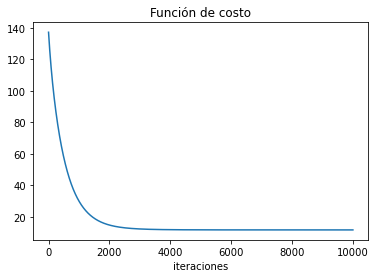

In [7]:
# Valores iniciales de los pesos
w0 = 0
w1 = 0
w2 = 0
w3 = 0
w4 = 0
w5 = 0
# Parámetros para el descenso del gradiente
iteraciones = 10000
alfa = 0.001

# Vector para almacenar la función de costo
J = np.zeros(iteraciones+1)
J[0] = 1/(2*n) * np.sum((h(X,w0,w1,w2,w3,w4,w5)-y)**2)
# Iteraciones del descenso del gradiente
for i in np.arange(iteraciones):
    e = h(X, w0, w1,w2,w3,w4,w5) - y                 # error
    w0n = w0 - alfa/n * np.sum(e)            # actualización de w0
    w1n = w1 - alfa*1/n*np.sum( (h(X,w0,w1,w2,w3,w4,w5)-y)*X )
    w2n = w2 - alfa*1/n*np.sum( (h(X,w0,w1,w2,w3,w4,w5)-y)*X )
    w3n = w3 - alfa*1/n*np.sum( (h(X,w0,w1,w2,w3,w4,w5)-y)*X )
    w4n = w4 - alfa*1/n*np.sum( (h(X,w0,w1,w2,w3,w4,w5)-y)*X )
    w5n = w5 - alfa*1/n*np.sum( (h(X,w0,w1,w2,w3,w4,w5)-y)*X )
    w0 = w0n
    w1 = w1n
    w2 = w2n
    w3 = w3n
    w4 = w4n
    w5 = w5n
    J[i+1]=1/(2*n) * np.sum((h(X,w0,w1,w2,w3,w4,w5)-y)**2)

JJ=1/(2*n) * np.sum((h(X,w0,w1,w2,w3,w4,w5)-y)**2)
print("La función de costo es : {}".format(np.round(JJ,3)))

plt.plot(J)
plt.title("Función de costo"); plt.xlabel("iteraciones");

Probamos el modelo en nuestros datos y podemos observar que ajusta mucho mejor que con los primeros pesos puestos aleatoriamente

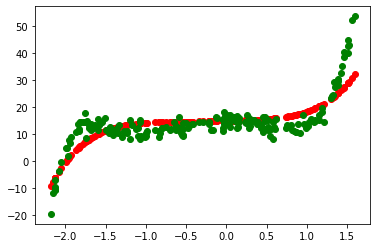

In [8]:
ypredc=h(X,w0,w1,w2,w3,w4,w5)

plt.scatter(X,ypredc,linestyle='-', color = 'red')
plt.scatter(X,y,linestyle='-', color = 'green')

#### Testeo del modelo y calculo del MSE

A continuación usaremos los datos del testeo y evaluaremos el desempeño del modelo usando MSE

In [9]:
xtest = test[:,0:1]
xtest = xtest.T
ytest = test[:,1]
ytest = ytest[None]
n=len(test[:,1])

y_prede = h(xtest,w0,w1,w2,w3,w4,w5)

MSE = np.sum((ytest-y_prede)**2)/n
MSE


19.35885298740613

### Pregunta 2

Descargar los archivos housing.data y housing.names del repositorio UCI Machine Learning Repository. El primer archivo contiene varios atributos relacionados
con el precio de casas en Boston; y el segundo archivo contiene la descripción de lo que representa cada columna. Los datos deben ser divididos de manera aleatoria en un 80 % para entrenamiento y un 20 % para prueba, aproximadamente. Usar regresión lineal (multivariable) para encontrar el modelo de predicción, visualizando el comportamiento de la función de costo. Utilizar el conjunto de prueba generado, para validar el funcionamiento del modelo, usando alguna métrica.

#### Lectura de datos y Normalización

Primero generamos una semilla usando la función np.random.seed, de esta forma la muestra aleatoria de datos siempre sera la misma. Luego generaremos valores de 0 a 506. Luego dividiremos el 80 % de los datos para entrenamiento y el otro 20 % para testeo.

In [10]:
data = np.loadtxt('housing_data.txt')

In [11]:
np.random.seed(seed=0)
rango=random.sample(range(0, 506), 506)

DF= data[rango]

train=DF[0:406,:]
test=DF[406:,:]


In [12]:
xa = train[:,0:13]
xa = xa.T
ya = train[:,13]
ya = ya[None]

n=len(train[:,13])
n

406

In [13]:
# Normalización de los atributos
mu = np.mean(xa, axis=1, keepdims=True)
sigma = np.std(xa, axis=1, keepdims=True)
xaNorm = (xa - mu)/sigma

#### Funciones de hipótesis y costo para regresión lineal

In [14]:
# Función de hipótesis
def h(X, w, w0):
    return np.dot(w.T, X) + w0

# Función de costo
def fcosto(X, y, w, w0):
    n = y.size
    e = h(X, w, w0) - y
    return 1/(2*n)*np.sum(np.square(e))

#### Parámetros Óptimos usando Descenso del gradiente

La función de costo es : 11.103


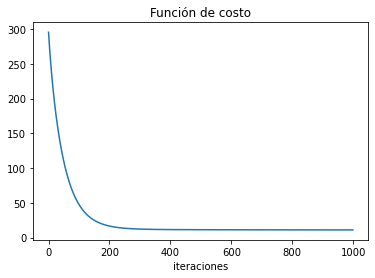

In [15]:
# Valores iniciales de los pesos
w0 = 0
w = np.zeros((13,1))

# Parámetros para el descenso del gradiente
iteraciones = 1000
alfa = 0.01 

# Vector para almacenar la función de costo
J = np.zeros(iteraciones)
# Iteraciones del descenso del gradiente
for i in np.arange(iteraciones):
    e = h(xaNorm, w,w0) - ya   # error
    w0 = w0 - alfa/n * np.sum(e)            # actualización de w0
    w = w - alfa/n * np.dot(xaNorm, e.T)     # actualización de w
    J[i] = fcosto(xaNorm, ya, w, w0)          # Función de costo
    
plt.plot(J)
plt.title("Función de costo"); plt.xlabel("iteraciones");
JJ=fcosto(xaNorm, ya, w, w0); 
print("La función de costo es : {}".format(np.round(JJ,3)))


#### Testeo del modelo y calculo del desempeño del modelo

A continuación usaremos los datos del testeo y evaluaremos el desempeño del modelo usando distintas metricas de evaluación 

In [16]:
xtest = test[:,0:13]
xtest = xtest.T
ytest = test[:,13]
ytest = ytest[None]

n=len(test[:,13])
n


100

#### Normalización de los datos de testeo

In [17]:
# Normalización de los atributos de test
mutest = np.mean(xtest, axis=1, keepdims=True)
sigmatest = np.std(xtest, axis=1, keepdims=True)
xtestNorm = (xtest - mutest)/sigmatest

#### Metricas de evaluación

Evaluando las siguientes metricas para regresión, podemos concluir que tenemos un buen modelo

In [18]:
ypred=h(xtestNorm,w,w0)

# MSE (Mean Square Error)
MSE = np.sum((ytest-ypred)**2)/n
print("La MSE es : {}".format(np.round(MSE,3)))

# MAE (Mean Absolute Error)
MAE = np.sum(ytest-ypred)/n
print("La MAE es : {}".format(np.round(MAE,3)))

# MAPE (Mean Absolute Percentage Error)
MAPE = np.sum((ytest-ypred)/ytest)/n
print("La MAPE es : {}".format(np.round(MAPE,3)))


# RMSE (Root Mean Square Error)
RMSE = np.sqrt(np.sum((ytest-ypred)**2)/n)
print("La RMSE es : {}".format(np.round(RMSE,3)))


# R^2 (Coeficiente de determinación)
R2=1-(np.sum((ytest-ypred)**2)/np.sum((ytest-np.mean(ytest, axis=1, keepdims=True))**2))
print("El coeficiente de determinación es : {}".format(np.round(R2,5)))

La MSE es : 24.256
La MAE es : -1.145
La MAPE es : -0.097
La RMSE es : 4.925
El coeficiente de determinación es : 0.65191


### Pregunta 3

El archivo datos clasificacion.csv tiene tres columnas: las dos primeras representan los dos atributos x1, x2, y la última columna representa la clase y a la cual pertenece la instancia, donde y ∈ {0, 1}. Dividir los datos en conjunto de entrenamiento y conjunto de prueba (usando el criterio 80 %-20 %). Entrenar un clasificador basado en regresión logística para clasificar los datos. Dado que la curva de decisión es no lineal, se usará bases polinomiales que incluirán combinaciones de ambos atributos hasta el sexto grado.
Estos atributos se obtienen usando la función generacion bases. Además, el clasificador debe tener un término de regularización L2. Graficar los puntos y la frontera de decisión (se puede usar las funciones plot data y plot frontera). Igualmente, graficar la función de costo para verificar que converge.

#### Lectura de datos y Normalización

In [19]:
data = np.loadtxt('datos_clasificacion.txt', delimiter=',')

In [20]:
np.random.seed(seed=0)
rango=random.sample(range(0, 118), 118)

DF= data[rango]

train=DF[0:94,:]
test=DF[94:,:]


In [21]:
# Instancias y sus respectivos valores de salida deseados
X = train[:,0:2]; y = train[:,2];
# Conversión al tamaño (y forma) deseados
X = X.T             # (2,n)
y = y[None,:]       # (1,n)
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
# Número de instancias (tamaño de la muestra)
n = y.size

Tamaño de X: (2, 94)
Tamaño de y: (1, 94)


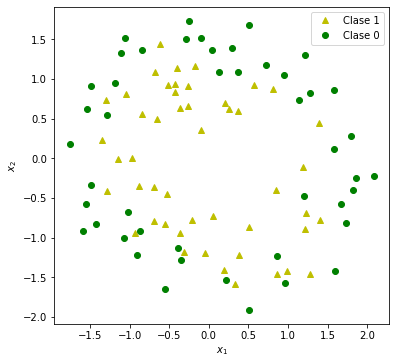

In [22]:
# Normalización de los datos
mu = np.mean(X, axis=1, keepdims=True)
sigma = np.std(X, axis=1, keepdims=True)
Xn = (X-mu)/sigma
# Gráfico de los datos normalizados
plot_data(Xn, y)

#### Funciones de hipotesis de y costo (Ridge) para regresión logistica 

In [23]:
# Función de hipótesis
def h(X, w, w0):
    z = np.dot(w.T, X) + w0
    g = 1 / (1 + np.exp(-z))
    return g

# Función de costo
def calcular_costo(X, y, w, w0,lam):
    ypred = h(X, w, w0)
    n = y.size
    J = (-1/n)*( np.dot(y, np.log(ypred).T) + np.dot((1-y), np.log(1-ypred).T))+lam*np.sum(w**2)/(2*n)
    return J.squeeze()

#### Parámetros Óptimos usando Descenso del gradiente

Parámetros entrenados: w_0=0.92, w1=-0.18, w2=0.06


array(0.37289818)

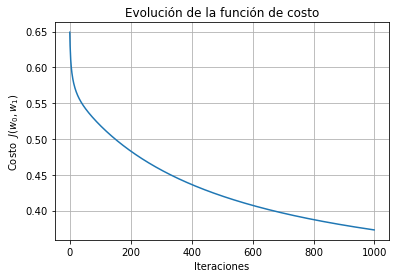

In [24]:
# Generamos una base polinomial de sexto grado

Xm= generacion_bases(Xn,6)

# Inicialización de los parámetros
w = np.zeros((len(Xm),1))
w0 = 0
# Parámetros del descenso de gradiente
iteraciones = 1000
alfa = 0.01
lam = 0.1

# Descenso del gradiente
n = y.size
J_history = np.zeros(iteraciones)
for i in np.arange(iteraciones):
    e = h(Xm, w, w0) - y
    w0 = w0 - alfa*(1/n)*np.sum(e)
    w = w*(1-alfa*lam/n) - alfa*(1/n)*np.dot(Xm, e.T)
    J_history[i] = calcular_costo(Xm, y, w, w0,lam)
    
    
print("Parámetros entrenados: w_0={:.2f}, w1={:.2f}, w2={:.2f}".format(w0, w[0,0], w[1,0]))

# Gráfico de la función de costo
plt.plot(J_history); plt.ylabel('Costo  $J(w_0,w_1)$'); plt.grid()
plt.xlabel('Iteraciones'); plt.title('Evolución de la función de costo');

calcular_costo(Xm, y, w, w0,lam)

#### Clasificación de datos de clase 1 y clase 0

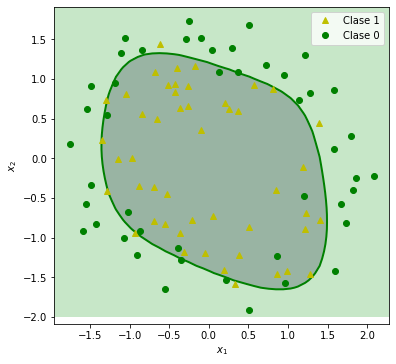

In [25]:
# Gráfico de las instancias
plot_data(Xn, y)

# Determinación de la frontera de decisión
plot_frontera(w0,w)

#### Testeo del modelo 

In [26]:
# Instancias y sus respectivos valores de salida deseados
Xtest = test[:,0:2]; ytest = test[:,2];
# Conversión al tamaño (y forma) deseados
Xtest = Xtest.T             # (2,n)
ytest = ytest[None,:]       # (1,n)
print("Tamaño de X:", Xtest.shape)
print("Tamaño de y:", ytest.shape)
# Número de instancias (tamaño de la muestra)
n = ytest.size

Tamaño de X: (2, 24)
Tamaño de y: (1, 24)


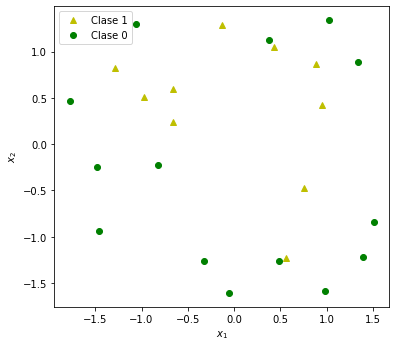

In [27]:
# Normalización de los datos
mu = np.mean(Xtest, axis=1, keepdims=True)
sigma = np.std(Xtest, axis=1, keepdims=True)
Xntest = (Xtest-mu)/sigma
# Gráfico de los datos normalizados
plot_data(Xntest, ytest)

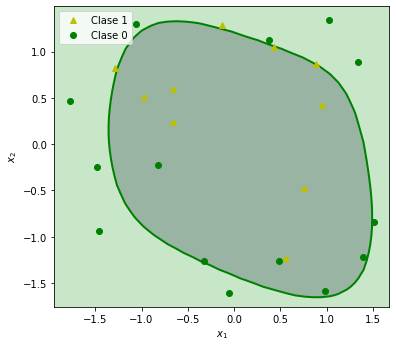

In [28]:
# Probando la funcion de hipotesis obtenida
Xmtest= generacion_bases(Xntest,6)

yest=h(Xmtest,w,w0)


# Gráfico de las instancias
plot_data(Xntest, ytest)

# Determinación de la frontera de decisión
plot_frontera(w0,w)

### Pregunta 4

Dados un conjunto de atributos relacionados con el género, la edad, condiciones como asma, hipertensión, etc. se desea predecir si una persona a quien se le detecta COVID-19 ingresará a cuidados intensivos (UCI). Se utilizará los datos llamados covid train.csv y covid test.csv (para entrenamiento y prueba, respectivamente), que son datasets reducidos del dataset completo que se encuentra aquí. Utilizando regresión logística, entrenar un sistema que detecte, en la medida de lo posible, el ingreso a UCI dados los atributos de entrada. Una vez que se tenga el sistema entrenado, calcular algunas métricas para evaluar el desempeño del sistema, e indicar si existe overfitting (sobreajuste) o underfitting (subajuste).


#### Lectura de datos y Normalización: 

Cargamos los modelos de los datos de entrenamiento y testeo usando la función de numpy np.loadtxt() y colocamos el delimiter para que esta sepa qué los datos se encuentran separados por comas.

In [29]:
# Lectura de datos
# ================
train = np.loadtxt('covid_train.txt', delimiter=",")
test  = np.loadtxt('covid_test.txt', delimiter=",")


In [30]:
# Instancias y sus respectivos valores de salida deseados
X = train[:,0:18]; y = train[:,18];
# Conversión al tamaño (y forma) deseados
X = X.T             # (18,n)
y = y[None,:]       # (1,n)
#Les restamos un 1 a las salidas para que nos queden en el rango de 0-1
y = y-np.ones(4554,).T
print("Tamaño de X:", X.shape)
print("Tamaño de y:", y.shape)
# Número de instancias (tamaño de la muestra)
n = y.size

Tamaño de X: (18, 4554)
Tamaño de y: (1, 4554)


#### Función de hipótesis y de costo para regresión logistica (vectorizadas) 

In [31]:
# Función de hipótesis
def h(X, w, w0):
    z = np.dot(w.T, X) + w0
    g = 1 / (1 + np.exp(-z))
    return g

# Función de costo
def calcular_costo(X, y, w, w0,lam):
    ypred = h(X, w, w0)
    n = y.size
    J = (-1/n)*( np.dot(y, np.log(ypred).T) + np.dot((1-y), np.log(1-ypred).T))+lam*np.sum(w**2)/(2*n)
    return J.squeeze()

#### Parámetros Óptimos usando Descenso del gradiente

Parámetros entrenados: w_0=0.00, w1=0.00, w2=0.01


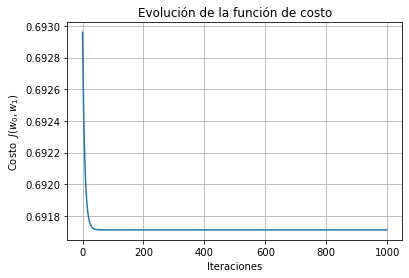

In [32]:
# Generamos una base polinomial de segundo grado 

Xm= generacion_bases(X,2)

# Inicialización de los parámetros
w = np.zeros((len(Xm),1))
w0 = 0
# Parámetros del descenso de gradiente
iteraciones = 1000
alfa = 0.01
lam = 10

# Descenso del gradiente
n = y.size
J_history = np.zeros(iteraciones)
for i in np.arange(iteraciones):
    e = h(Xm, w, w0) - y
    w0 = w0 - alfa*(1/n)*np.sum(e)
    w = w*(1-alfa*lam/n) - alfa*(1/n)*np.dot(Xm, e.T)
    J_history[i] = calcular_costo(Xm, y, w, w0,lam)
    
    
print("Parámetros entrenados: w_0={:.2f}, w1={:.2f}, w2={:.2f}".format(w0, w[0,0], w[1,0]))

# Gráfico de la función de costo
plt.plot(J_history); plt.ylabel('Costo  $J(w_0,w_1)$'); plt.grid()
plt.xlabel('Iteraciones'); plt.title('Evolución de la función de costo');

#### Testeo del modelo y calculo del MSE

In [33]:
# Instancias y sus respectivos valores de salida deseados
Xtest = test[:,0:18]; ytest = test[:,18];
# Número de instancias (tamaño de la muestra)
ntest = ytest.size
# Conversión al tamaño (y forma) deseados
Xtest = Xtest.T             # (18,n)
ytest = ytest[None,:]       # (1,n)
#Les restamos un 1 a las salidas para que nos queden en el rango de 0-1 
ytest = ytest-np.ones(1139,).T #El vector de 1 es del largo de ntest
print("Tamaño de X:", Xtest.shape)
print("Tamaño de y:", ytest.shape)

Tamaño de X: (18, 1139)
Tamaño de y: (1, 1139)


In [34]:
# Creamos una base polinomial de segundo grado
Xtestm= generacion_bases(Xtest,2)

# Predecimos la respuesta del y de testeo usando el X de test en una base 
# polinomial de segundo orden y luego lo comparamos con el y de testeo real
yestimado = h(Xtestm,w,w0)

# Con este modelo calculamos el MSE de nuestro test
MSEtest=np.sum((ytest-yestimado)**2)/1139
print("El MSE del testeo es:",np.round(MSEtest,8))

# De la misma manera, calculamos el MSE del modelo, el cual calculamos 
# utilizando el y de entrenamiento y el y obtenido de la función de hipotesis
yentrenamiento = h(Xm,w,w0)

MSE = np.sum((y-yentrenamiento)**2)/4554
print("El MSE del entrenamiento es:", np.round(MSE,8))

# Podemos apreciar que el error es minimo en ambos casos

El MSE del testeo es: 0.24928295
El MSE del entrenamiento es: 0.24928232


#### Comprobación de Overfitting

Es importante comprobar que los modelos obtenidos en el entrenamiento y en el testeo tengan valores similares de exactitud, por lo que haremos uso de la función predecir para verificar que tan exacto es nuestro modelo.

In [35]:
# Exactitud de entrenamiento
def predecir(X, w, w0):
    yprob = h(X, w, w0)
    n = X.shape[1]    # Número de instancias a predecir
    ypred = np.zeros((1, n))
    ypred[0, yprob.flatten()>=0.5] = 1
    return ypred

In [36]:
# Porcentaje de exactitud del modelo 
ypred = predecir(Xm, w, w0)
exactitud = np.mean(ypred == y)*100
print('Exactitud del modelo: {:.3f} %'.format(exactitud))

Exactitud del modelo: 52.679 %


In [37]:
# Porcentaje de exactitud del entrenamiento 
ypred = predecir(Xtestm, w, w0)
exactitud = np.mean(ypred == ytest)*100
print('Exactitud del entrenamiento: {:.3f} %'.format(exactitud))

Exactitud del entrenamiento: 52.678 %
